22BAI1118 Mayank Raj

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt


#table 
from tabulate import tabulate
# List to store the results
results = []

np.random.seed(1671)  # for reproducibility

# Network and training parameters
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10  # number of outputs = number of digits
OPTIMIZER = SGD()  # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2  # how much TRAIN is reserved for VALIDATION

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images and normalize
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED).astype('float32') / 255
X_test = X_test.reshape(10000, RESHAPED).astype('float32') / 255

# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)


Model 1 Basic 

In [2]:
# Build the model_1_basic
model_1_basic = Sequential()
model_1_basic.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model_1_basic.add(Activation('softmax'))
model_1_basic.summary()

# Compile the model_1_basic
model_1_basic.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy', Precision(), Recall()])

# Train the model_1_basic
history_1 = model_1_basic.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)

# Evaluate the model_1_basic
scores_1 = model_1_basic.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy:", scores_1[1])

results.append([1,"Model 1: Basic", scores_1[1], history_1.history['precision'][19], history_1.history['recall'][19]])


C:\Users\MYK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6989 - loss: 1.1462 - precision: 0.9279 - recall: 0.3733 - val_accuracy: 0.8967 - val_loss: 0.4090 - val_precision: 0.9510 - val_recall: 0.8337
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8921 - loss: 0.4165 - precision: 0.9398 - recall: 0.8317 - val_accuracy: 0.9110 - val_loss: 0.3327 - val_precision: 0.9444 - val_recall: 0.8760
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9086 - loss: 0.3400 - precision: 0.9401 - recall: 0.8741 - val_accuracy: 0.9165 - val_loss: 0.3073 - val_precision: 0.9423 - val_recall: 0.8907
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9160 - loss: 0.3114 - precision: 0.9421 - recall: 0.8878 - val_accuracy: 0.9215 - val_loss: 0.2922 - val_precision: 0.9434 - val_recall: 0.8972
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9177 - loss: 0.2962 - precision: 0.9406 - recall: 0.8939 - val_accuracy: 0.9203 - val_loss: 0.

In [3]:
print(history_1.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


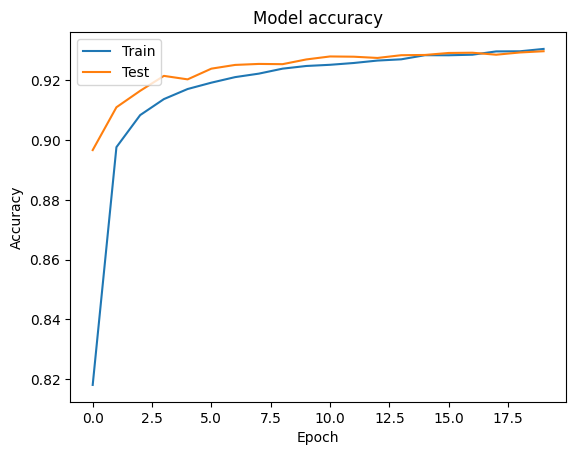

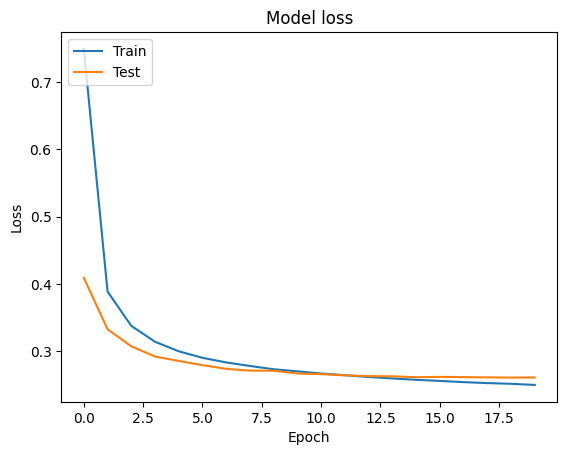

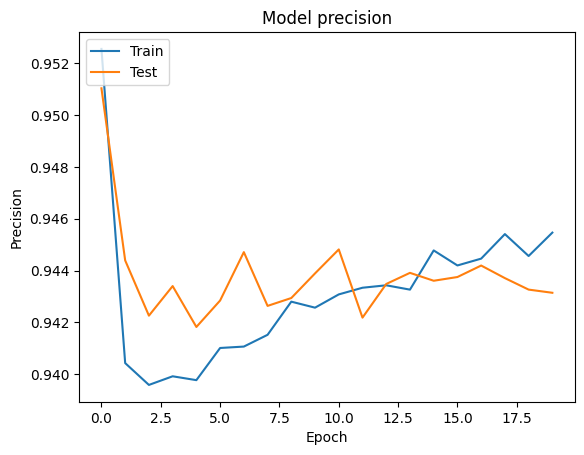

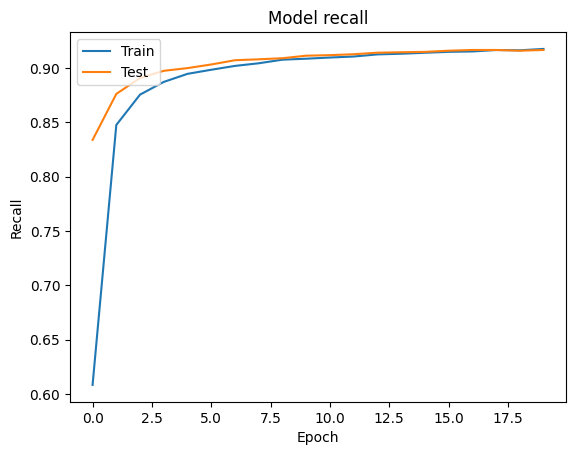

In [4]:
# Plot accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_1.history['precision'])
plt.plot(history_1.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 2  Change in number of hidden layers

In [5]:
# Build the model_2_hidden_layers
model_2_hidden_layers = Sequential()
model_2_hidden_layers.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_2_hidden_layers.add(Dropout(0.2))
model_2_hidden_layers.add(Dense(N_HIDDEN, activation='relu'))
model_2_hidden_layers.add(Dropout(0.2))
model_2_hidden_layers.add(Dense(NB_CLASSES, activation='softmax'))
model_2_hidden_layers.summary()

# Compile the model_2_hidden_layers
model_2_hidden_layers.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy', Precision(), Recall()])

# Train the model_2_hidden_layers
history_2 = model_2_hidden_layers.fit(X_train, Y_train,
                                    batch_size=BATCH_SIZE,
                                    epochs=NB_EPOCH,
                                    verbose=VERBOSE,
                                    validation_split=VALIDATION_SPLIT)

# Evaluate the model_2_hidden_layers
scores_2 = model_2_hidden_layers.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_2_hidden_layers:", scores_2[1])
results.append([2,"Model 2: More Hidden Layers", scores_2[1], history_2.history['precision_1'][19], history_2.history['recall_1'][19]])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7547 - loss: 0.7902 - precision_1: 0.8911 - recall_1: 0.6207 - val_accuracy: 0.9488 - val_loss: 0.1749 - val_precision_1: 0.9615 - val_recall_1: 0.9375
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.2119 - precision_1: 0.9530 - recall_1: 0.9226 - val_accuracy: 0.9611 - val_loss: 0.1285 - val_precision_1: 0.9681 - val_recall_1: 0.9546
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9579 - loss: 0.1470 - precision_1: 0.9669 - recall_1: 0.9479 - val_accuracy: 0.9682 - val_loss: 0.1059 - val_precision_1: 0.9750 - val_recall_1: 0.9638
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1148 - precision_1: 0.9720 - recall_1: 0.9587 - val_accuracy: 0.9710 - val_loss: 0.0989 - val_precision_1: 0.9762 - val_recall_1: 0.9674
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.0962 - precision_1: 0.9760 - recall_1: 0.9658 -

In [6]:
print(history_2.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


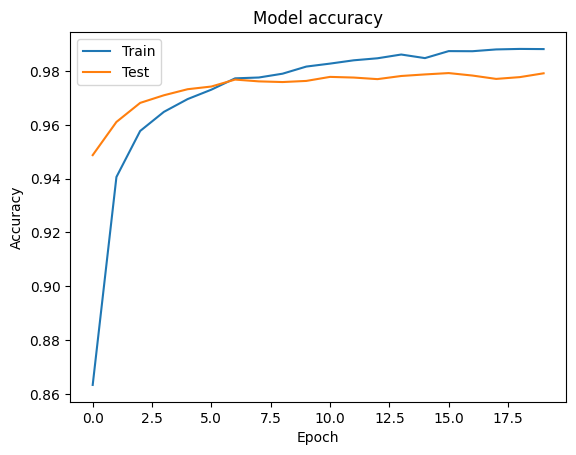

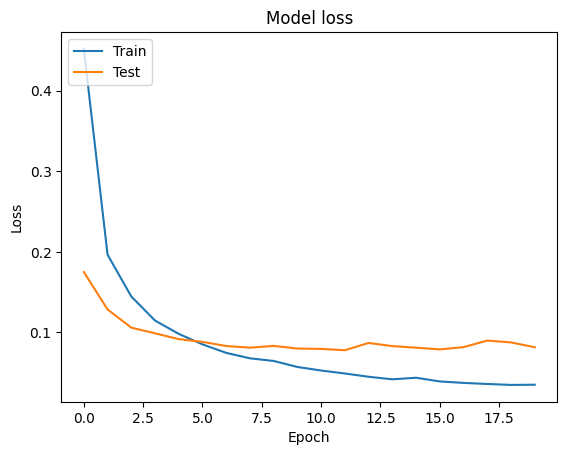

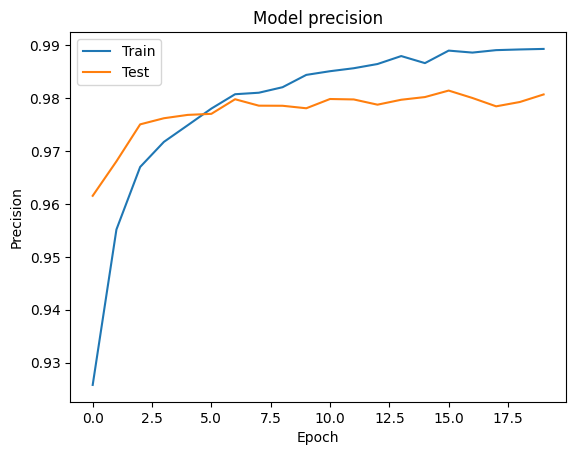

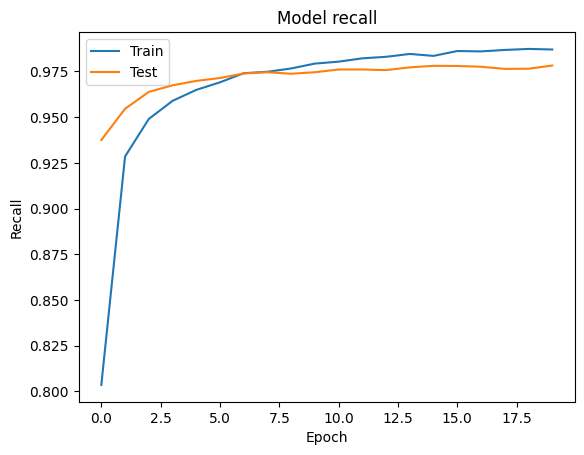

In [7]:
# Plot accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_2.history['precision_1'])
plt.plot(history_2.history['val_precision_1'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_2.history['recall_1'])
plt.plot(history_2.history['val_recall_1'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 3 Change in activation function


In [8]:
# Build the model_3_activation_function
model_3_activation_function = Sequential()
model_3_activation_function.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='tanh'))
model_3_activation_function.add(Dense(NB_CLASSES, activation='softmax'))
model_3_activation_function.summary()

# Compile the model_3_activation_function
model_3_activation_function.compile(optimizer='adam',
                                    loss='categorical_crossentropy',
                                    metrics=['accuracy', Precision(), Recall()])

# Train the model_3_activation_function
history_3 = model_3_activation_function.fit(X_train, Y_train,
                                          batch_size=BATCH_SIZE,
                                          epochs=NB_EPOCH,
                                          verbose=VERBOSE,
                                          validation_split=VALIDATION_SPLIT)

# Evaluate the model_3_activation_function
scores_3 = model_3_activation_function.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_3_activation_function:", scores_3[1])
results.append([3,"Model 3: Tanh Activation", scores_3[1], history_3.history['precision_2'][19],history_3.history['recall_2'][19]])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8224 - loss: 0.6348 - precision_2: 0.9254 - recall_2: 0.6957 - val_accuracy: 0.9317 - val_loss: 0.2399 - val_precision_2: 0.9501 - val_recall_2: 0.9160
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9320 - loss: 0.2328 - precision_2: 0.9496 - recall_2: 0.9184 - val_accuracy: 0.9482 - val_loss: 0.1886 - val_precision_2: 0.9613 - val_recall_2: 0.9377
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9518 - loss: 0.1709 - precision_2: 0.9643 - recall_2: 0.9415 - val_accuracy: 0.9546 - val_loss: 0.1548 - val_precision_2: 0.9660 - val_recall_2: 0.9477
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9616 - loss: 0.1325 - precision_2: 0.9714 - recall_2: 0.9526 - val_accuracy: 0.9607 - val_loss: 0.1361 - val_precision_2: 0.9683 - val_recall_2: 0.9533
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9689 - loss: 0.1097 - precision_2: 0.9769 - recall_2: 0.9626 

In [9]:
print(history_3.history.keys())

dict_keys(['accuracy', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])


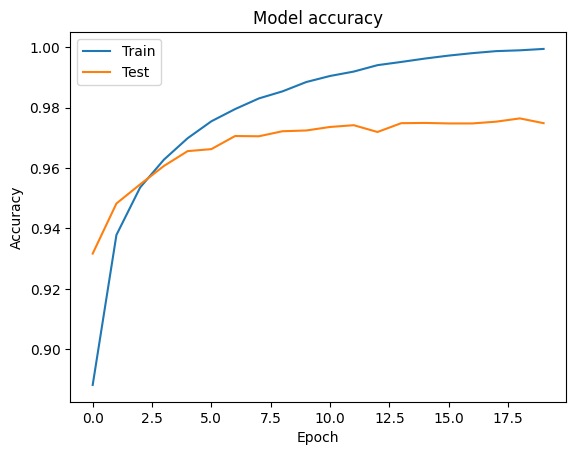

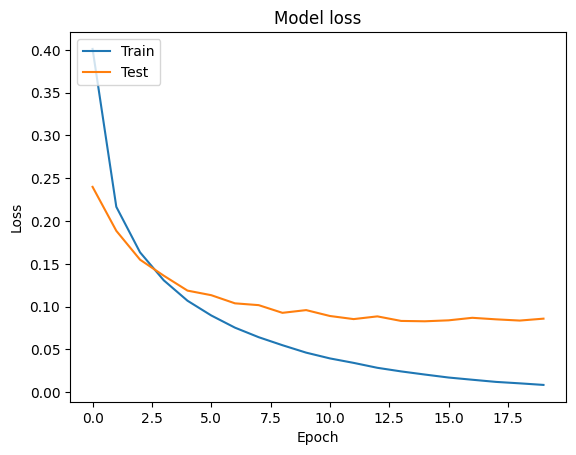

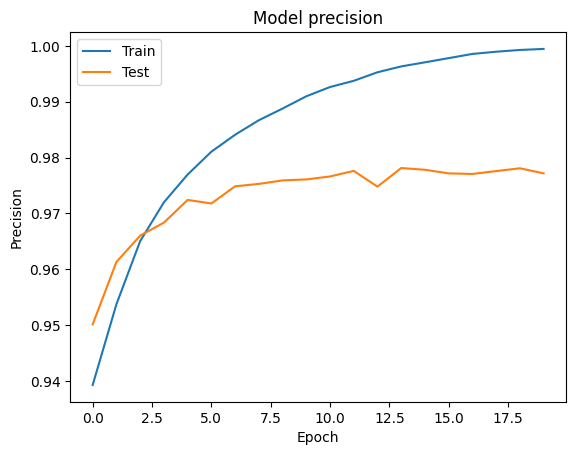

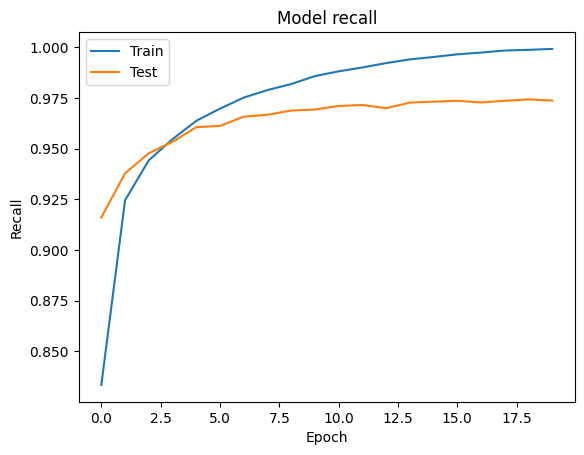

In [10]:
# Plot accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_3.history['precision_2'])
plt.plot(history_3.history['val_precision_2'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_3.history['recall_2'])
plt.plot(history_3.history['val_recall_2'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Moodel 4 Change in number of epochs

In [11]:
# Build the model_4_epochs
model_4_epochs = Sequential()
model_4_epochs.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_4_epochs.add(Dense(NB_CLASSES, activation='softmax'))
model_4_epochs.summary()

# Compile the model_4_epochs
model_4_epochs.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy', Precision(), Recall()])

# Train the model_4_epochs
history_4 = model_4_epochs.fit(X_train, Y_train,
                             batch_size=BATCH_SIZE,
                             epochs=50,
                             verbose=VERBOSE,
                             validation_split=VALIDATION_SPLIT)

# Evaluate the model_4_epochs
scores_4 = model_4_epochs.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_4_epochs:", scores_4[1])
results.append([4,"Model 4: 20 Epochs", scores_4[1], history_4.history['precision_3'][19],history_4.history['recall_3'][19]])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8062 - loss: 0.6825 - precision_3: 0.9270 - recall_3: 0.6679 - val_accuracy: 0.9421 - val_loss: 0.2088 - val_precision_3: 0.9576 - val_recall_3: 0.9287
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9438 - loss: 0.2009 - precision_3: 0.9580 - recall_3: 0.9300 - val_accuracy: 0.9563 - val_loss: 0.1582 - val_precision_3: 0.9660 - val_recall_3: 0.9477
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9602 - loss: 0.1396 - precision_3: 0.9696 - recall_3: 0.9519 - val_accuracy: 0.9582 - val_loss: 0.1452 - val_precision_3: 0.9666 - val_recall_3: 0.9514
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1091 - precision_3: 0.9755 - recall_3: 0.9617 - val_accuracy: 0.9672 - val_loss: 0.1172 - val_precision_3: 0.9736 - val_recall_3: 0.9626
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0863 - precision_3: 0.9806 - recall_3: 0.9713

In [12]:
print(history_4.history.keys())

dict_keys(['accuracy', 'loss', 'precision_3', 'recall_3', 'val_accuracy', 'val_loss', 'val_precision_3', 'val_recall_3'])


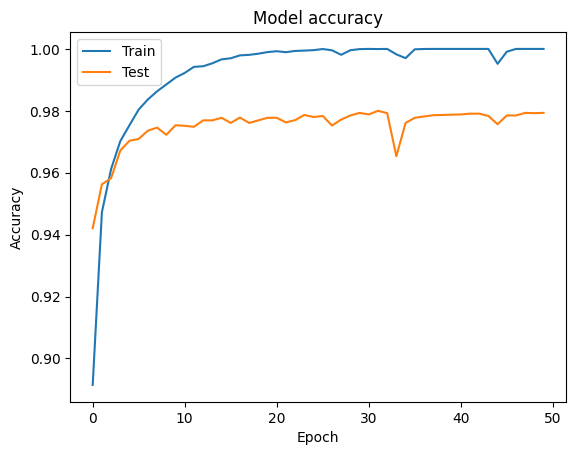

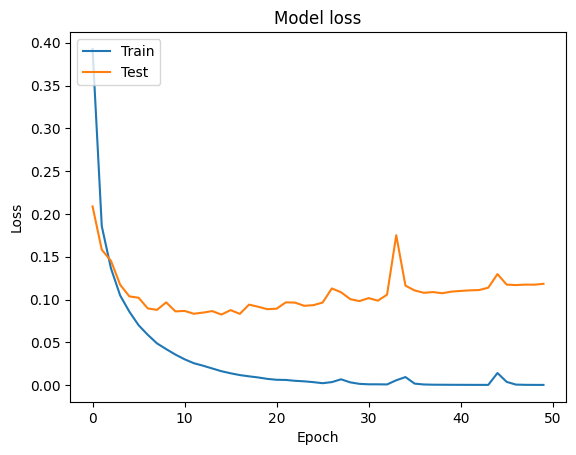

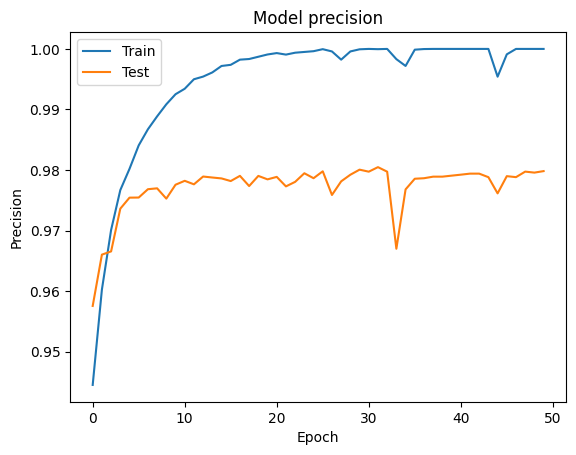

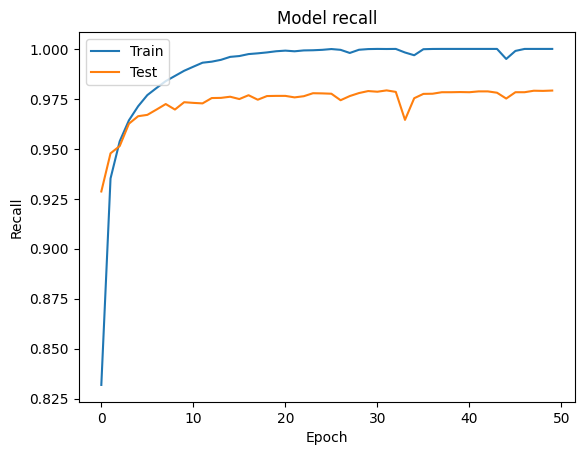

In [13]:
# Plot accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_4.history['precision_3'])
plt.plot(history_4.history['val_precision_3'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_4.history['recall_3'])
plt.plot(history_4.history['val_recall_3'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 5 Change in batch size

In [14]:
# Build the model_5_batch_size
model_5_batch_size = Sequential()
model_5_batch_size.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_5_batch_size.add(Dense(NB_CLASSES, activation='softmax'))
model_5_batch_size.summary()

# Compile the model_5_batch_size
model_5_batch_size.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy', Precision(), Recall()])

# Train the model_5_batch_size
history_5 = model_5_batch_size.fit(X_train, Y_train,
                                 batch_size=64,
                                 epochs=NB_EPOCH,
                                 verbose=VERBOSE,
                                 validation_split=VALIDATION_SPLIT)

# Evaluate the model_5_batch_size
scores_5 = model_5_batch_size.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_5_batch_size:", scores_5[1])
results.append([5,"Model 5: Batch Size 64", scores_5[1], history_5.history['precision_4'][19],history_5.history['recall_4'][19]])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8449 - loss: 0.5555 - precision_4: 0.9364 - recall_4: 0.7365 - val_accuracy: 0.9525 - val_loss: 0.1726 - val_precision_4: 0.9634 - val_recall_4: 0.9420
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.1610 - precision_4: 0.9648 - recall_4: 0.9446 - val_accuracy: 0.9608 - val_loss: 0.1367 - val_precision_4: 0.9680 - val_recall_4: 0.9544
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1085 - precision_4: 0.9761 - recall_4: 0.9633 - val_accuracy: 0.9666 - val_loss: 0.1149 - val_precision_4: 0.9723 - val_recall_4: 0.9612
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0774 - precision_4: 0.9817 - recall_4: 0.9728 - val_accuracy: 0.9699 - val_loss: 0.1036 - val_precision_4: 0.9739 - val_recall_4: 0.9663
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9824 - loss: 0.0639 - precision_4: 0.9858 - recall_4: 0.9791 -

In [15]:
print(history_5.history.keys())

dict_keys(['accuracy', 'loss', 'precision_4', 'recall_4', 'val_accuracy', 'val_loss', 'val_precision_4', 'val_recall_4'])


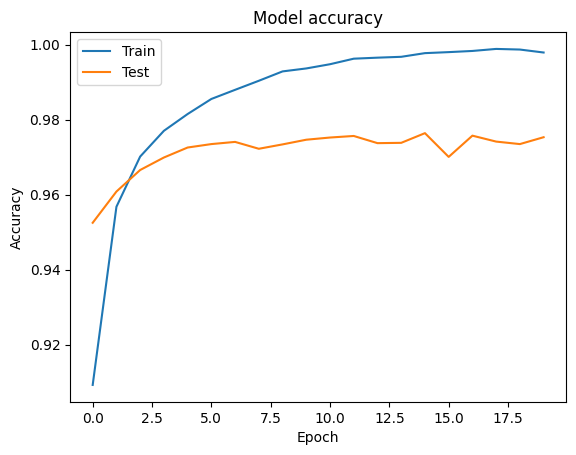

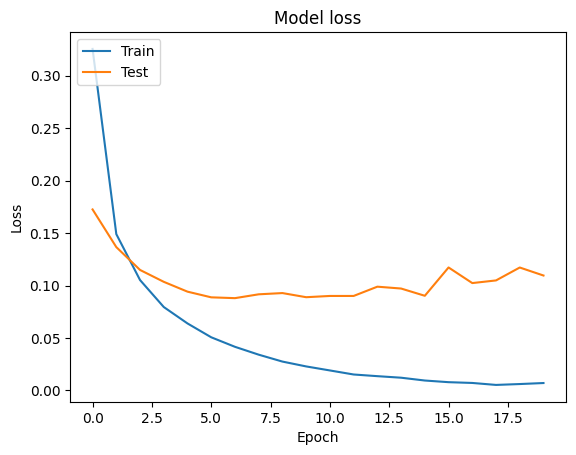

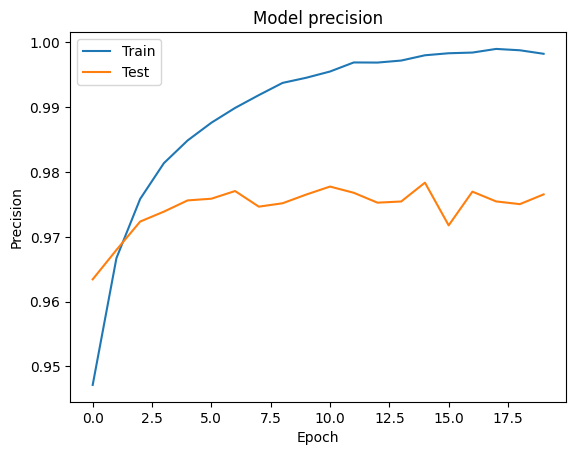

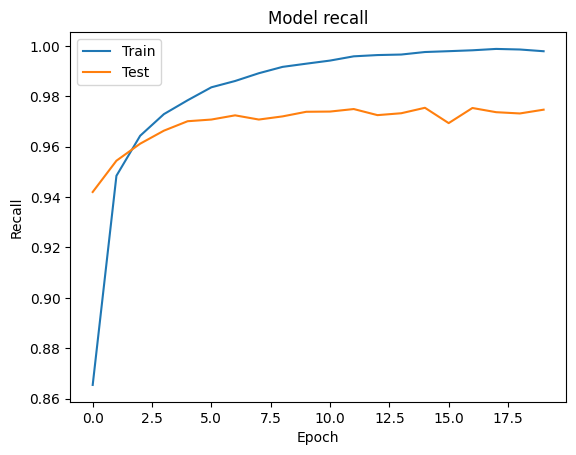

In [16]:
# Plot accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_5.history['precision_4'])
plt.plot(history_5.history['val_precision_4'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_5.history['recall_4'])
plt.plot(history_5.history['val_recall_4'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 6 Change in optimizer

In [17]:
# Build the model_6_optimizer
model_6_optimizer = Sequential()
model_6_optimizer.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_6_optimizer.add(Dense(NB_CLASSES, activation='softmax'))
model_6_optimizer.summary()

# Compile the model_6_optimizer
model_6_optimizer.compile(optimizer=OPTIMIZER,
                          loss='categorical_crossentropy',
                          metrics=['accuracy', Precision(), Recall()])

# Train the model_6_optimizer
history_6 = model_6_optimizer.fit(X_train, Y_train,
                                batch_size=BATCH_SIZE,
                                epochs=NB_EPOCH,
                                verbose=VERBOSE,
                                validation_split=VALIDATION_SPLIT)

# Evaluate the model_6_optimizer
scores_6 = model_6_optimizer.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_6_optimizer:", scores_6[1])
results.append([6,"Model 6: Adam Optimizer", scores_6[1],history_6.history['precision_5'][19], history_6.history['recall_5'][19]])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5363 - loss: 1.6754 - precision_5: 0.8653 - recall_5: 0.0896 - val_accuracy: 0.8490 - val_loss: 0.7094 - val_precision_5: 0.9731 - val_recall_5: 0.6239
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8427 - loss: 0.6722 - precision_5: 0.9612 - recall_5: 0.6532 - val_accuracy: 0.8809 - val_loss: 0.4869 - val_precision_5: 0.9549 - val_recall_5: 0.7881
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.4960 - precision_5: 0.9485 - recall_5: 0.7804 - val_accuracy: 0.8941 - val_loss: 0.4107 - val_precision_5: 0.9500 - val_recall_5: 0.8325
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.4342 - precision_5: 0.9406 - recall_5: 0.8217 - val_accuracy: 0.9000 - val_loss: 0.3723 - val_precision_5: 0.9470 - val_recall_5: 0.8537
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.3912 - precision_5: 0.9392 - recall_5: 0.8469 -

In [18]:
print(history_6.history.keys())

dict_keys(['accuracy', 'loss', 'precision_5', 'recall_5', 'val_accuracy', 'val_loss', 'val_precision_5', 'val_recall_5'])


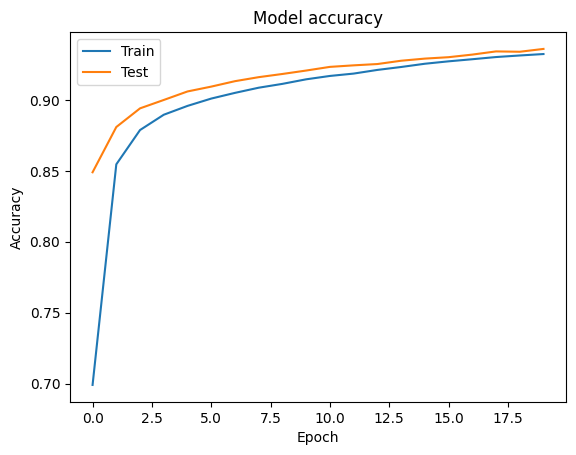

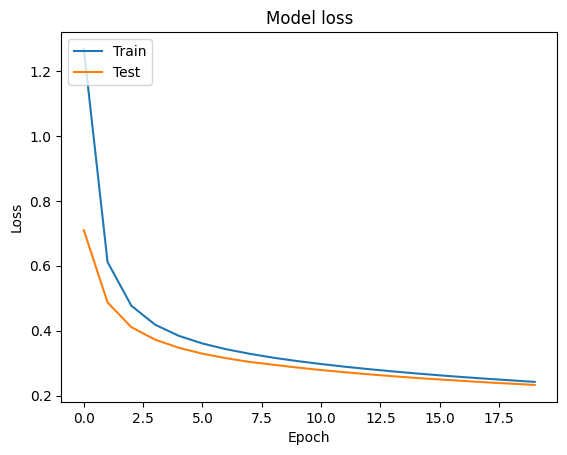

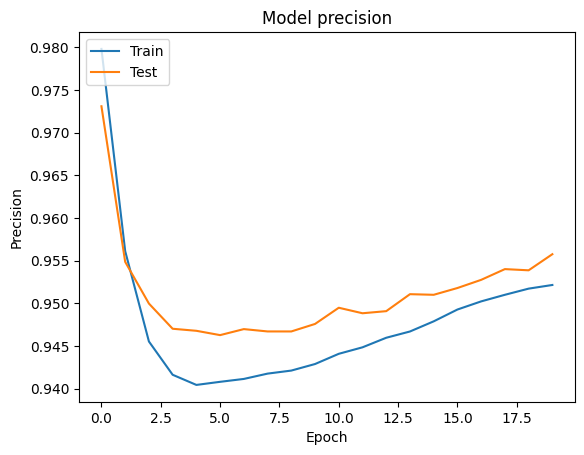

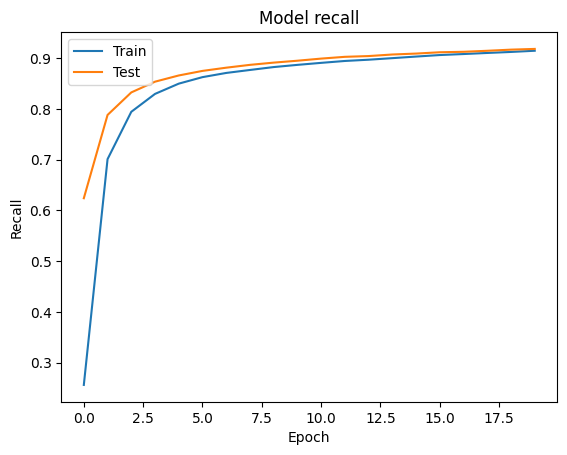

In [19]:
# Plot accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_6.history['precision_5'])
plt.plot(history_6.history['val_precision_5'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_6.history['recall_5'])
plt.plot(history_6.history['val_recall_5'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 7 Change in validation split

In [20]:

# Build the model_7_validation_split
model_7_validation_split = Sequential()
model_7_validation_split.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_7_validation_split.add(Dense(NB_CLASSES, activation='softmax'))
model_7_validation_split.summary()

# Compile the model_7_validation_split
model_7_validation_split.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy', Precision(), Recall()])

# Train the model_7_validation_split
history_7 = model_7_validation_split.fit(X_train, Y_train,
                                        batch_size=BATCH_SIZE,
                                        epochs=NB_EPOCH,
                                        verbose=VERBOSE,
                                        validation_split=0.1)

# Evaluate the model_7_validation_split
scores_7 = model_7_validation_split.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_7_validation_split:", scores_7[1])
results.append([7,"Model 7: Validation Split 0.3", scores_7[1], history_7.history['precision_6'][19], history_7.history['recall_6'][19]])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8263 - loss: 0.6405 - precision_6: 0.9364 - recall_6: 0.6890 - val_accuracy: 0.9565 - val_loss: 0.1675 - val_precision_6: 0.9697 - val_recall_6: 0.9445
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.1851 - precision_6: 0.9615 - recall_6: 0.9352 - val_accuracy: 0.9623 - val_loss: 0.1284 - val_precision_6: 0.9714 - val_recall_6: 0.9560
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9608 - loss: 0.1348 - precision_6: 0.9706 - recall_6: 0.9528 - val_accuracy: 0.9715 - val_loss: 0.1038 - val_precision_6: 0.9763 - val_recall_6: 0.9660
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0986 - precision_6: 0.9782 - recall_6: 0.9657 - val_accuracy: 0.9757 - val_loss: 0.0877 - val_precision_6: 0.9806 - val_recall_6: 0.9697
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0803 - precision_6: 0.9820 - recall_6: 0.9729 -

In [21]:
print(history_7.history.keys())

dict_keys(['accuracy', 'loss', 'precision_6', 'recall_6', 'val_accuracy', 'val_loss', 'val_precision_6', 'val_recall_6'])


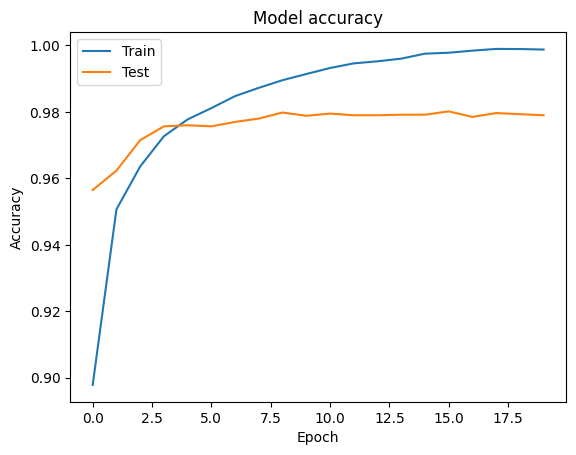

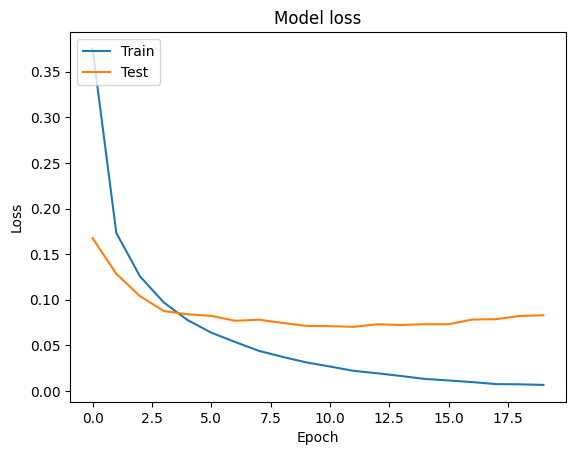

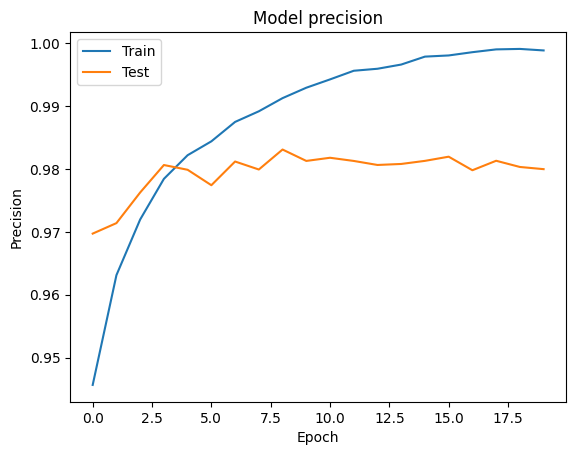

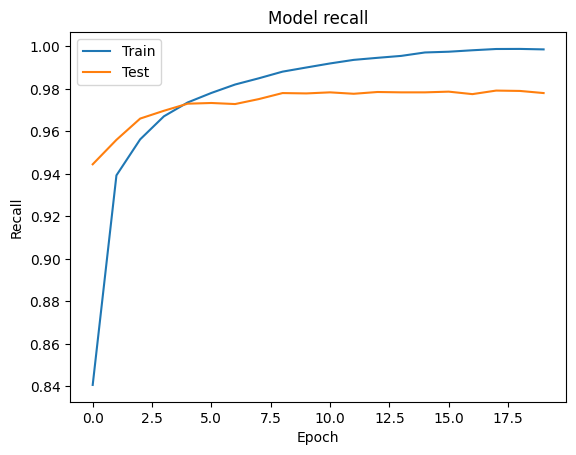

In [22]:
# Plot accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_7.history['precision_6'])
plt.plot(history_7.history['val_precision_6'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_7.history['recall_6'])
plt.plot(history_7.history['val_recall_6'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 8 Change in drop out rate

In [23]:

# Build the model_8_dropout
model_8_dropout = Sequential()
model_8_dropout.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu'))
model_8_dropout.add(Dropout(0.5))  # Changed dropout rate
model_8_dropout.add(Dense(NB_CLASSES, activation='softmax'))
model_8_dropout.summary()

# Compile the model_8_dropout
model_8_dropout.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy', Precision(), Recall()])

# Train the model_8_dropout
history_8 = model_8_dropout.fit(X_train, Y_train,
                              batch_size=BATCH_SIZE,
                              epochs=NB_EPOCH,
                              verbose=VERBOSE,
                              validation_split=VALIDATION_SPLIT)

# Evaluate the model_8_dropout
scores_8 = model_8_dropout.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy for model_8_dropout:", scores_8[1])
results.append([8,"Model 8: Dropout 0.5", scores_8[1], history_8.history['precision_7'][19], history_8.history['recall_7'][19]])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7204 - loss: 0.8935 - precision_7: 0.8925 - recall_7: 0.5582 - val_accuracy: 0.9349 - val_loss: 0.2325 - val_precision_7: 0.9540 - val_recall_7: 0.9152
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.2988 - precision_7: 0.9392 - recall_7: 0.8862 - val_accuracy: 0.9501 - val_loss: 0.1752 - val_precision_7: 0.9636 - val_recall_7: 0.9388
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2443 - precision_7: 0.9463 - recall_7: 0.9096 - val_accuracy: 0.9567 - val_loss: 0.1471 - val_precision_7: 0.9658 - val_recall_7: 0.9482
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.2079 - precision_7: 0.9543 - recall_7: 0.9265 - val_accuracy: 0.9631 - val_loss: 0.1301 - val_precision_7: 0.9703 - val_recall_7: 0.9548
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9437 - loss: 0.1904 - precision_7: 0.9570 - recall_7: 0.9316 -

In [24]:
print(history_8.history.keys())

dict_keys(['accuracy', 'loss', 'precision_7', 'recall_7', 'val_accuracy', 'val_loss', 'val_precision_7', 'val_recall_7'])


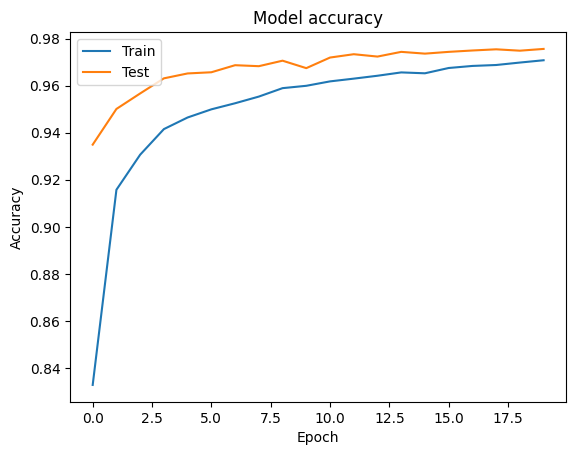

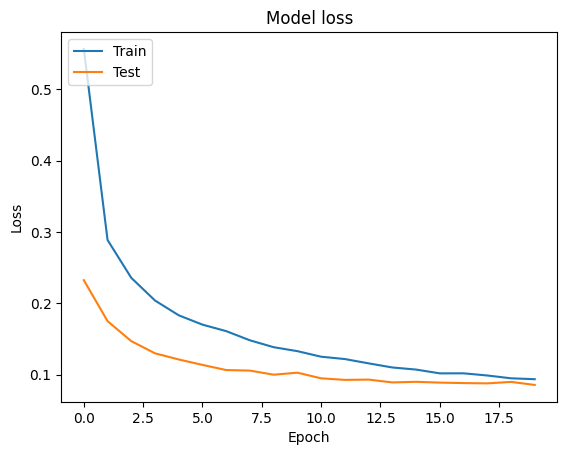

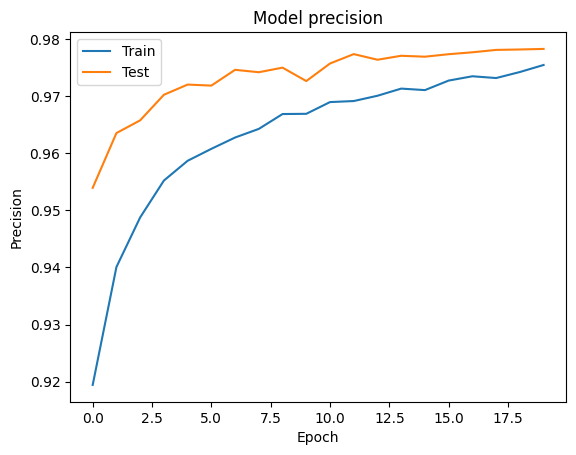

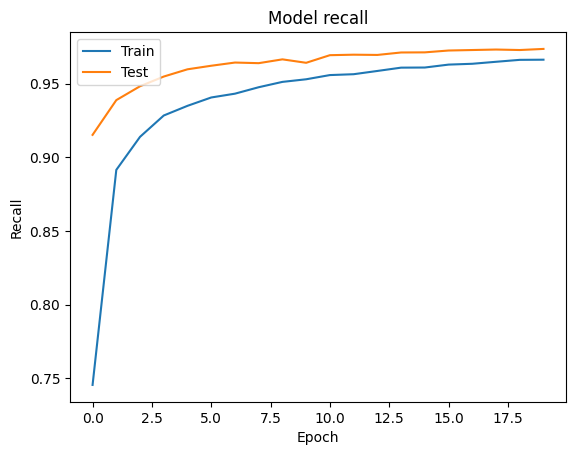

In [25]:
# Plot accuracy
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history_8.history['precision_7'])
plt.plot(history_8.history['val_precision_7'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history_8.history['recall_7'])
plt.plot(history_8.history['val_recall_7'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Table 

In [26]:
print(tabulate(results, headers=["S. No", "Model name/ Model number", "Accuracy", "Precision", "Recall"]))

  S. No  Model name/ Model number         Accuracy    Precision    Recall
-------  -----------------------------  ----------  -----------  --------
      1  Model 1: Basic                     0.9269     0.945464  0.917396
      2  Model 2: More Hidden Layers        0.9804     0.989309  0.987021
      3  Model 3: Tanh Activation           0.9776     0.999458  0.999167
      4  Model 4: 20 Epochs                 0.9797     0.999083  0.998833
      5  Model 5: Batch Size 64             0.9773     0.998228  0.997854
      6  Model 6: Adam Optimizer            0.9357     0.952157  0.914646
      7  Model 7: Validation Split 0.3      0.9779     0.998833  0.998537
      8  Model 8: Dropout 0.5               0.976      0.975495  0.966187
